# 1、项目背景
数据源：dataset.csv

字段说明：
ROW ID 行编号
ORDER ID 订单ID
ORDER DATE 订单日期
SHIP DATE 发货日期
SHIP MODE 发货模式
CUSTOMER ID 客户ID
CUSTOMER NAME 客户姓名
SEGMENT 客户类别
CITY 客户所在城市
STATE 客户所在州
COUNTRY 客户所在国家
POSTAL CODE 邮编
MARKET 商店所属区域
REGION 商店所属洲
PRODUCT ID 产品ID
CATEGORY 产品类别
SUB-CATEGORY 产品子类别
PRODUCT NAME 产品名称
SALES 销售额
DISCOUNT 折扣
PROFIT 利润
SHIPPNG COST 发货成本
ORDER PRIORITY 订单优先级

# 2、数据读取

In [1]:
import pandas as pd
data=pd.read_csv('./dataset.csv',encoding='ISO-8859-1')
data

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,City,State,...,ProductID,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority
0,1,IN-2011-47883,2011/1/1,2011/1/8,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
1,2,IN-2011-47883,2011/1/1,2011/1/8,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-PA-10001968,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55.242,2,0.1,15.342,1.80,Medium
2,3,IN-2011-47883,2011/1/1,2011/1/8,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium
3,4,IT-2011-3647632,2011/1/1,2011/1/5,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,5,HU-2011-1220,2011/1/1,2011/1/5,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51096,51094,IN-2014-75603,2014/12/31,2015/1/5,Second Class,BS-11365,Bill Shonely,Corporate,Vijayawada,Andhra Pradesh,...,OFF-FA-10000263,Office Supplies,Fasteners,"Stockwell Thumb Tacks, Bulk Pack",39.420,3,0.0,17.280,2.97,Medium
51097,51095,TU-2014-5170,2014/12/31,2015/1/4,Second Class,VD-11670,Valerie Dominguez,Consumer,Konya,Konya,...,FUR-TEN-10000558,Furniture,Furnishings,"Tenex Frame, Erganomic",173.760,4,0.6,-117.360,13.72,Medium
51098,51096,MO-2014-2560,2014/12/31,2015/1/5,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-M,...,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.420,0.49,Medium
51099,51097,ES-2014-4785777,2014/12/31,2015/1/4,Standard Class,DP-13390,Dennis Pardue,Home Office,Hamburg,Hamburg,...,OFF-BI-10000620,Office Supplies,Binders,"Wilson Jones Index Tab, Economy",32.250,5,0.0,8.250,2.21,Medium


# 3、数据清洗

3.1根据业务需要提取数据发货日期早于下单日期

In [3]:
data['ShipDate']=pd.to_datetime(data['ShipDate'])
data['OrderDate']=pd.to_datetime(data['OrderDate'])
data['interval']=(data.ShipDate-data.OrderDate).dt.total_seconds()
data[data.interval<0]
data.drop(index=data[data.interval<0].index,inplace=True)
data
data['interval']=data.ShipDate - data.OrderDate
data


,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,City,State,...,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority,interval
0,1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,7 days
1,2,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55.242,2,0.1,15.342,1.80,Medium,7 days
2,3,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,7 days
3,4,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,4 days
4,5,HU-2011-1220,2011-01-01,2011-01-05,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,4 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51096,51094,IN-2014-75603,2014-12-31,2015-01-05,Second Class,BS-11365,Bill Shonely,Corporate,Vijayawada,Andhra Pradesh,...,Office Supplies,Fasteners,"Stockwell Thumb Tacks, Bulk Pack",39.420,3,0.0,17.280,2.97,Medium,5 days
51097,51095,TU-2014-5170,2014-12-31,2015-01-04,Second Class,VD-11670,Valerie Dominguez,Consumer,Konya,Konya,...,Furniture,Furnishings,"Tenex Frame, Erganomic",173.760,4,0.6,-117.360,13.72,Medium,4 days
51098,51096,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-M,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.420,0.49,Medium,5 days
51099,51097,ES-2014-4785777,2014-12-31,2015-01-04,Standard Class,DP-13390,Dennis Pardue,Home Office,Hamburg,Hamburg,...,Office Supplies,Binders,"Wilson Jones Index Tab, Economy",32.250,5,0.0,8.250,2.21,Medium,4 days


3.2 处理与业务流程不符合的数据，如售价为负

In [4]:
data[data.Sales<0]

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,City,State,...,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority,interval


3.3查看数据

In [6]:
#查看行列数量
data.shape

(51097, 25)

In [7]:
#查看各个列的非空数据量
data.count()

RowID            51097
OrderID          51097
OrderDate        51097
ShipDate         51097
ShipMode         51086
CustomerID       51097
CustomerName     51097
Segment          51097
City             51097
State            51097
Country          51097
PostalCode        9962
Market           51097
Region           51097
ProductID        51097
Category         51097
Sub-Category     51097
ProductName      51097
Sales            51097
Quantity         51097
Discount         51097
Profit           51097
ShippingCost     51097
OrderPriority    51097
interval         51097
dtype: int64

In [8]:
#NAN统计
data.isna().sum()

RowID                0
OrderID              0
OrderDate            0
ShipDate             0
ShipMode            11
CustomerID           0
CustomerName         0
Segment              0
City                 0
State                0
Country              0
PostalCode       41135
Market               0
Region               0
ProductID            0
Category             0
Sub-Category         0
ProductName          0
Sales                0
Quantity             0
Discount             0
Profit               0
ShippingCost         0
OrderPriority        0
interval             0
dtype: int64

In [9]:
#数据整体描述
data.describe()

,RowID,PostalCode,Sales,Quantity,Discount,Profit,ShippingCost,interval
count,51097.000000,9962.000000,51097.000000,51097.000000,51097.000000,51097.000000,51097.000000,51097
mean,25549.751668,55225.189319,246.568189,3.476036,0.143456,28.515431,26.385308,3 days 23:15:23.302737929
std,14750.670508,32062.973837,487.774029,2.279122,0.213386,174.483766,57.286297,1 days 17:30:17.616193519
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000,0 days 00:00:00
25%,12775.000000,23223.000000,30.816000,2.000000,0.000000,0.000000,2.610000,3 days 00:00:00
50%,25550.000000,57103.000000,85.140000,3.000000,0.000000,9.240000,7.800000,4 days 00:00:00
75%,38324.000000,90008.000000,251.100000,5.000000,0.200000,36.810000,24.450000,5 days 00:00:00
max,51098.000000,99301.000000,22638.480000,14.000000,1.500000,8399.976000,933.570000,7 days 00:00:00


In [10]:
#数据信息
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51097 entries, 0 to 51100
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   RowID          51097 non-null  int64          
 1   OrderID        51097 non-null  object         
 2   OrderDate      51097 non-null  datetime64[ns] 
 3   ShipDate       51097 non-null  datetime64[ns] 
 4   ShipMode       51086 non-null  object         
 5   CustomerID     51097 non-null  object         
 6   CustomerName   51097 non-null  object         
 7   Segment        51097 non-null  object         
 8   City           51097 non-null  object         
 9   State          51097 non-null  object         
 10  Country        51097 non-null  object         
 11  PostalCode     9962 non-null   float64        
 12  Market         51097 non-null  object         
 13  Region         51097 non-null  object         
 14  ProductID      51097 non-null  object         
 15  Ca

In [11]:
#浏览数据
data.head()

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,City,State,...,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority,interval
0,1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,7 days
1,2,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55.242,2,0.1,15.342,1.80,Medium,7 days
2,3,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,7 days
3,4,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,4 days
4,5,HU-2011-1220,2011-01-01,2011-01-05,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,4 days


3.4清洗RowID

In [12]:
#RowID不重复的个数
data.RowID.unique().size

51094

In [13]:
data[data.RowID.duplicated()]

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,City,State,...,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority,interval
141,141,ES-2011-4359424,2011-01-11,2011-01-15,Standard Class,DD-13570,Dorothy Dickinson,Consumer,Murcia,Murcia,...,Office Supplies,Labels,"Novimex File Folder Labels, Alphabetical",40.35,5,0.0,5.55,2.57,High,4 days
11566,11565,IN-2012-81581,2012-05-12,2012-05-16,Standard Class,BW-11200,Ben Wallace,Consumer,Canberra,Australian Capital Territory,...,Office Supplies,Storage,"Fellowes Shelving, Blue",57.84,1,0.0,16.17,10.68,High,4 days
32648,32646,CM-2013-4490,2013-12-12,2013-12-14,Second Class,CW-1905,Carl Weiss,Home Office,Bamenda,Nord-Ouest,...,Office Supplies,Storage,"Eldon Lockers, Blue",395.82,2,0.0,39.54,45.77,Medium,2 days


In [14]:
data.drop(index=data[data.RowID.duplicated()].index,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51094 entries, 0 to 51100
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   RowID          51094 non-null  int64          
 1   OrderID        51094 non-null  object         
 2   OrderDate      51094 non-null  datetime64[ns] 
 3   ShipDate       51094 non-null  datetime64[ns] 
 4   ShipMode       51083 non-null  object         
 5   CustomerID     51094 non-null  object         
 6   CustomerName   51094 non-null  object         
 7   Segment        51094 non-null  object         
 8   City           51094 non-null  object         
 9   State          51094 non-null  object         
 10  Country        51094 non-null  object         
 11  PostalCode     9962 non-null   float64        
 12  Market         51094 non-null  object         
 13  Region         51094 non-null  object         
 14  ProductID      51094 non-null  object         
 15  Ca

3.5清洗ShipMode

In [15]:
#查看shipmode的空值
data[data.ShipMode.isnull()]

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,City,State,...,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority,interval
13666,13665,BU-2012-460,2012-07-21,2012-07-25,NaN,AH-30,Aaron Hawkins,Corporate,Pazardzhik,Pazardzhik,...,Office Supplies,Envelopes,"GlobeWeis Business Envelopes, Set of 50",17.340,1,0.0,4.680,1.29,Medium,4 days
13674,13673,BU-2012-460,2012-07-21,2012-07-25,NaN,AH-30,Aaron Hawkins,Corporate,Pazardzhik,Pazardzhik,...,Furniture,Chairs,"Office Star Swivel Stool, Adjustable",176.430,1,0.0,17.640,12.70,Medium,4 days
18385,18384,AG-2012-6390,2012-11-26,2012-11-30,NaN,GH-4410,Gary Hansen,Home Office,Algiers,Alger,...,Office Supplies,Paper,"SanDisk Parchment Paper, Premium",16.710,1,0.0,3.150,1.10,Medium,4 days
33167,33165,MZ-2013-7330,2013-12-23,2013-12-25,NaN,CS-1950,Carlos Soltero,Consumer,Chimoio,Manica,...,Office Supplies,Supplies,"Elite Ruler, Easy Grip",15.420,1,0.0,1.050,1.03,Medium,2 days
33619,33617,AE-2013-1530,2013-12-31,2014-01-03,NaN,MY-7380,Maribeth Yedwab,Corporate,Ras al Khaymah,Ra's Al Khaymah,...,Office Supplies,Supplies,"Stiletto Letter Opener, High Speed",16.668,2,0.7,-29.472,1.41,High,3 days
33622,33620,AE-2013-1530,2013-12-31,2014-01-03,NaN,MY-7380,Maribeth Yedwab,Corporate,Ras al Khaymah,Ra's Al Khaymah,...,Office Supplies,Storage,"Tenex Folders, Blue",6.966,1,0.7,-8.604,1.75,High,3 days
38164,38162,MX-2014-153269,2014-05-19,2014-05-22,NaN,MC-17275,Marc Crier,Consumer,Rosario,Santa Fe,...,Office Supplies,Envelopes,"Kraft Mailers, Recycled",43.740,3,0.4,7.260,7.50,High,3 days
44243,44241,AJ-2014-6170,2014-09-16,2014-09-18,NaN,SH-9975,Sally Hughsby,Corporate,Baku,Baki,...,Office Supplies,Storage,"Rogers Folders, Wire Frame",29.760,1,0.0,3.270,4.28,High,2 days
44321,44319,ES-2014-4138124,2014-09-17,2014-09-22,NaN,BF-11275,Beth Fritzler,Corporate,Oslo,Oslo,...,Technology,Phones,"Nokia Audio Dock, Full Size",840.150,5,0.0,142.800,23.19,High,5 days
49931,49929,US-2014-134292,2014-12-14,2014-12-20,NaN,JK-15640,Jim Kriz,Home Office,La Chorrera,Panama,...,Office Supplies,Paper,"Eaton Message Books, 8.5 x 11",29.664,3,0.4,-0.036,1.82,Medium,6 days


In [16]:
#对空值用众数进行修补
data['ShipMode'].fillna(value=data.ShipMode.mode()[0],inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51094 entries, 0 to 51100
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   RowID          51094 non-null  int64          
 1   OrderID        51094 non-null  object         
 2   OrderDate      51094 non-null  datetime64[ns] 
 3   ShipDate       51094 non-null  datetime64[ns] 
 4   ShipMode       51094 non-null  object         
 5   CustomerID     51094 non-null  object         
 6   CustomerName   51094 non-null  object         
 7   Segment        51094 non-null  object         
 8   City           51094 non-null  object         
 9   State          51094 non-null  object         
 10  Country        51094 non-null  object         
 11  PostalCode     9962 non-null   float64        
 12  Market         51094 non-null  object         
 13  Region         51094 non-null  object         
 14  ProductID      51094 non-null  object         
 15  Ca

3.6清洗Discount

In [22]:
data[data.Discount>1]
data[data.Discount<0]
data['Discount']=data['Discount'].mask(data['Discount']>1,None)
data
#查看Discount空值
data[data.Discount.isnull()]
#平均折扣
meanDiscount = round(data[data.Discount.notnull()].Discount.sum()/
                    data[data.Discount.notnull()].Discount.size,2)
meanDiscount

#对Discount的数据进行填补
data['Discount'].fillna(value=meanDiscount,inplace=True)
data.info()
data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51094 entries, 0 to 51100
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   RowID          51094 non-null  int64          
 1   OrderID        51094 non-null  object         
 2   OrderDate      51094 non-null  datetime64[ns] 
 3   ShipDate       51094 non-null  datetime64[ns] 
 4   ShipMode       51094 non-null  object         
 5   CustomerID     51094 non-null  object         
 6   CustomerName   51094 non-null  object         
 7   Segment        51094 non-null  object         
 8   City           51094 non-null  object         
 9   State          51094 non-null  object         
 10  Country        51094 non-null  object         
 11  PostalCode     9962 non-null   float64        
 12  Market         51094 non-null  object         
 13  Region         51094 non-null  object         
 14  ProductID      51094 non-null  object         
 15  Ca

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,City,State,...,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority,interval
0,1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,7 days
1,2,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55.242,2,0.1,15.342,1.80,Medium,7 days
2,3,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,7 days
3,4,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,4 days
4,5,HU-2011-1220,2011-01-01,2011-01-05,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,4 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51096,51094,IN-2014-75603,2014-12-31,2015-01-05,Second Class,BS-11365,Bill Shonely,Corporate,Vijayawada,Andhra Pradesh,...,Office Supplies,Fasteners,"Stockwell Thumb Tacks, Bulk Pack",39.420,3,0.0,17.280,2.97,Medium,5 days
51097,51095,TU-2014-5170,2014-12-31,2015-01-04,Second Class,VD-11670,Valerie Dominguez,Consumer,Konya,Konya,...,Furniture,Furnishings,"Tenex Frame, Erganomic",173.760,4,0.6,-117.360,13.72,Medium,4 days
51098,51096,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-M,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.420,0.49,Medium,5 days
51099,51097,ES-2014-4785777,2014-12-31,2015-01-04,Standard Class,DP-13390,Dennis Pardue,Home Office,Hamburg,Hamburg,...,Office Supplies,Binders,"Wilson Jones Index Tab, Economy",32.250,5,0.0,8.250,2.21,Medium,4 days


3.7清洗PostalCode列


In [24]:
data.drop(columns=['PostalCode'],inplace=True)
data

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,City,State,...,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit,ShippingCost,OrderPriority,interval
0,1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,7 days
1,2,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55.242,2,0.1,15.342,1.80,Medium,7 days
2,3,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,7 days
3,4,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,4 days
4,5,HU-2011-1220,2011-01-01,2011-01-05,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,4 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51096,51094,IN-2014-75603,2014-12-31,2015-01-05,Second Class,BS-11365,Bill Shonely,Corporate,Vijayawada,Andhra Pradesh,...,Office Supplies,Fasteners,"Stockwell Thumb Tacks, Bulk Pack",39.420,3,0.0,17.280,2.97,Medium,5 days
51097,51095,TU-2014-5170,2014-12-31,2015-01-04,Second Class,VD-11670,Valerie Dominguez,Consumer,Konya,Konya,...,Furniture,Furnishings,"Tenex Frame, Erganomic",173.760,4,0.6,-117.360,13.72,Medium,4 days
51098,51096,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-M,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.420,0.49,Medium,5 days
51099,51097,ES-2014-4785777,2014-12-31,2015-01-04,Standard Class,DP-13390,Dennis Pardue,Home Office,Hamburg,Hamburg,...,Office Supplies,Binders,"Wilson Jones Index Tab, Economy",32.250,5,0.0,8.250,2.21,Medium,4 days


3.8数据整理

In [25]:
#根据OrderDate生成年份/月份/季度的字段
data['Order-year']=data['OrderDate'].dt.year
data['Order-month']=data['OrderDate'].dt.month
data['quarter']=data['OrderDate'].dt.to_period('Q')
result=data[['OrderDate','Order-year','Order-month','quarter']].head()
print(result)

   OrderDate  Order-year  Order-month quarter
0 2011-01-01        2011            1  2011Q1
1 2011-01-01        2011            1  2011Q1
2 2011-01-01        2011            1  2011Q1
3 2011-01-01        2011            1  2011Q1
4 2011-01-01        2011            1  2011Q1


# 4、数据分析

4.1每年销售额的增长情况

In [26]:
sales_year=data.groupby(by='Order-year')['Sales'].sum()
print(sales_year)

Order-year
2011    2.254364e+06
2012    2.665397e+06
2013    3.393116e+06
2014    4.285524e+06
Name: Sales, dtype: float64


In [27]:
sales_rate_12 = sales_year[2012]/sales_year[2011]-1
sales_rate_13 = sales_year[2013]/sales_year[2012]-1
sales_rate_14 = sales_year[2014]/sales_year[2013]-1
print(sales_rate_12,sales_rate_13,sales_rate_14)

0.18232782910632728 0.2730243556885765 0.2630055018020854


In [28]:
sales_rate_12_label = "%.2f%%" %(sales_rate_12 *100)
sales_rate_13_label = "%.2f%%" %(sales_rate_13 *100)
sales_rate_14_label = "%.2f%%" %(sales_rate_14 *100)
print(sales_rate_12_label,sales_rate_13_label,sales_rate_14_label)

18.23% 27.30% 26.30%


In [29]:
sales_rate = pd.DataFrame({'sales_all':sales_year,
                          'sales_rate':[0,sales_rate_12,sales_rate_13,sales_rate_14],
                          'sales_rate_label':['0.00%',sales_rate_12_label,sales_rate_13_label,sales_rate_14_label]})
print(sales_rate)

               sales_all  sales_rate sales_rate_label
Order-year                                           
2011        2.254364e+06    0.000000            0.00%
2012        2.665397e+06    0.182328           18.23%
2013        3.393116e+06    0.273024           27.30%
2014        4.285524e+06    0.263006           26.30%


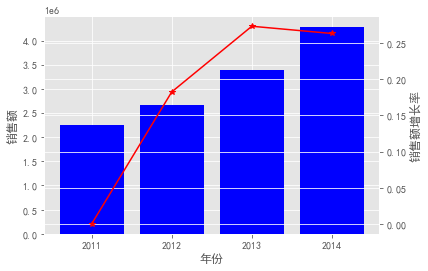

In [30]:
import matplotlib.pyplot as plt
import matplotlib as mpl

#设置字体
mpl.rcParams['font.sans-serif']=['SimHei']
#设置风格
plt.style.use('ggplot')
sales_rate = pd.DataFrame({'sales_all':sales_year,
                          'sales_rate':[0,sales_rate_12,sales_rate_13,sales_rate_14],
                          'sales_rate_label':['0.00%',sales_rate_12_label,sales_rate_13_label,sales_rate_14_label]})
y1=sales_rate['sales_all']
y2=sales_rate['sales_rate']
x=[str(value) for value in sales_rate.index.tolist()]

#新建figure对象
fig = plt.figure()
#新建子图1
ax1=fig.add_subplot(1,1,1)

ax2=ax1.twinx()
ax1.bar(x,y1,color='blue')
ax2.plot(x,y2,marker='*',color='r')
ax1.set_xlabel('年份')
ax1.set_ylabel('销售额')
ax2.set_ylabel('销售额增长率')
plt.show()

4.2 各个地区分店的销售额

<AxesSubplot:title={'center':'2011-2014年的总销售额占比'}, ylabel='Sales'>

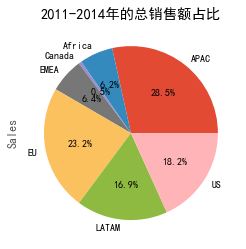

In [31]:
sales_area = data.groupby(by='Market')['Sales'].sum()
sales_area.plot(kind='pie',autopct="%1.1f%%",title='2011-2014年的总销售额占比')

<AxesSubplot:title={'center':'2011-2014年不同地区销售额对比'}, xlabel='Market'>

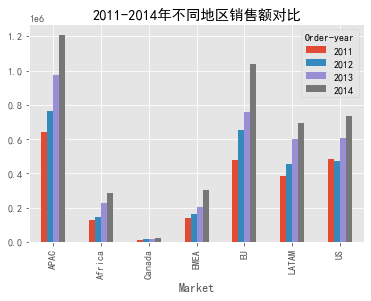

In [36]:
#各地区每一年的销售额
sales_area_year= data.groupby(by=['Market','Order-year'])['Sales'].sum()

#将分组后的多层索引设置成列数据
sales_area_year=sales_area_year.reset_index(level=[0,1])

#使用数据透视表重新整理数据
sales_area_year = pd.pivot_table(sales_area_year,
                                index='Market',
                                columns='Order-year',
                                values='Sales')
#绘制图形
sales_area_year.plot(kind='bar',title='2011-2014年不同地区销售额对比')


<AxesSubplot:title={'center':'不同类型产品在不同地区销售额对比'}, xlabel='Market'>

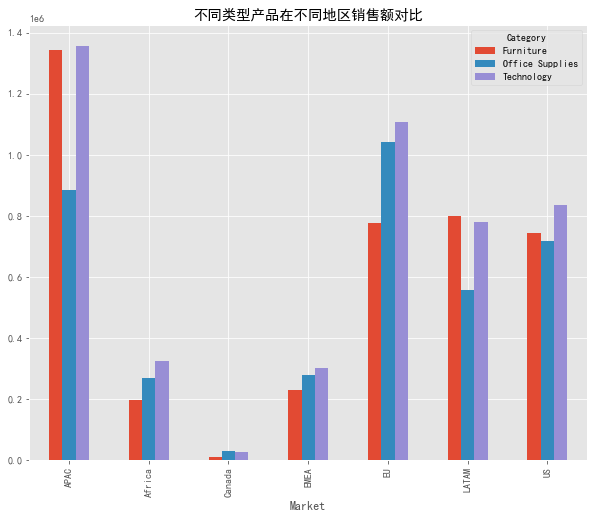

In [38]:
category_sales_area = data.groupby(by=['Market','Category'])['Sales'].sum()
category_sales_area

#将分组后的多层索引设置成列数据
category_sales_area=category_sales_area.reset_index(level=[0,1])
#使用数据透视表重新整理数据
category_sales_area=pd.pivot_table(category_sales_area,
                                  index='Market',
                                  columns='Category',
                                  values='Sales')
#绘制图形
category_sales_area.plot(kind='bar',
                        title='不同类型产品在不同地区销售额对比',
                        figsize=(10,8))


4.3销售淡旺季分析

<AxesSubplot:xlabel='Order-month'>

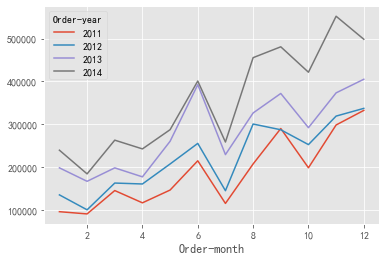

In [39]:
year_month = data.groupby(by=['Order-year','Order-month'])['Sales'].sum()

#将索引年转为一列数据
sales_year_month = year_month.reset_index(level=[0,1])

#利用透视表确定销售额表
sales_year_month = pd.pivot_table(sales_year_month,
                                 index='Order-month',
                                 columns='Order-year',
                                 values='Sales')
#绘制图形
sales_year_month.plot()

4.4新增客户

In [43]:
data_customer=data.copy()
data_customer=data_customer.drop_duplicates(subset=['CustomerID'])
new_customer=data_customer.groupby(by=['Order-year','Order-month']).size()
new_customer=new_customer.reset_index(level=[0,1])
customer_year_month=pd.pivot_table(new_customer,
                                  index='Order-month',
                                  columns='Order-year',
                                  values=0,
                                  fill_value=0)
customer_year_month

Order-year,2011,2012,2013,2014
Order-month,,,,
1,197,25,5,3
2,139,14,6,3
3,173,18,8,0
4,143,16,5,1
5,114,11,4,0
6,151,28,6,6
7,64,9,4,2
8,106,28,7,0
9,85,22,4,0


4.5 用户RFM模型

R：客户最近一次交易时间的间隔；R越大，表示客户交易发生的日期越久，反之则越近；

F：客户在最近一段时间内交易的次数，F越大，客户交易越频繁，反之不够活跃；

M：客户在最近一段时间内交易的金额，M越大，表示客户价值高，反之客户价值低

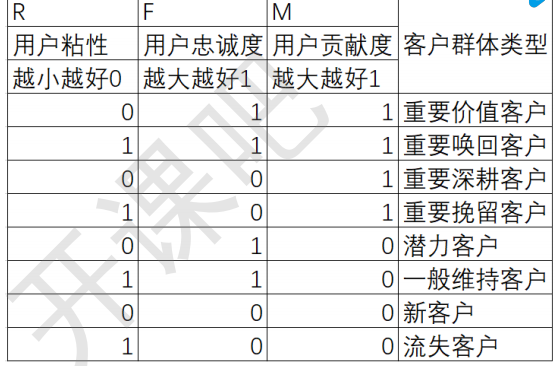

In [44]:
#获取2014年数据
data_14 = data[data['Order-year']==2014]

data_14=data_14[['CustomerID','OrderDate','Sales']]
print(data_14.shape)


(17475, 3)


In [50]:
customdf=data_14.copy()

customdf.set_index('CustomerID',drop=True,inplace=True)
customdf.head()

customdf['orders']=1
customdf.head()

rfmdf=customdf.pivot_table(index=['CustomerID'],
                          values=['OrderDate','orders','Sales'],
                          aggfunc={'OrderDate':'max',
                                  'orders':'sum',
                                  'Sales':'sum'})
rfmdf.head()

rfmdf['R']=(rfmdf.OrderDate.max()-rfmdf.OrderDate).dt.days
rfmdf.rename(columns={'Sales':'M','orders':'F'},inplace=True)
rfmdf

,OrderDate,M,F,R
CustomerID,,,,
AA-10315,2014-12-23,3889.2065,17,8
AA-10375,2014-12-25,1904.5380,14,6
AA-10480,2014-08-28,7752.9070,10,125
AA-10645,2014-12-03,3539.8788,19,28
AA-315,2014-12-29,787.3920,3,2
...,...,...,...,...
YS-21880,2014-12-22,7282.4740,19,9
ZC-11910,2014-06-14,7.1730,1,200
ZC-21910,2014-12-28,4922.8390,27,3


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '重要价值客户'),
  Text(1, 0, '新客户'),
  Text(2, 0, '流失客户'),
  Text(3, 0, '潜力客户'),
  Text(4, 0, '重要深耕客户'),
  Text(5, 0, '重要唤回客户'),
  Text(6, 0, '重要挽留客户'),
  Text(7, 0, '一般维持客户')])

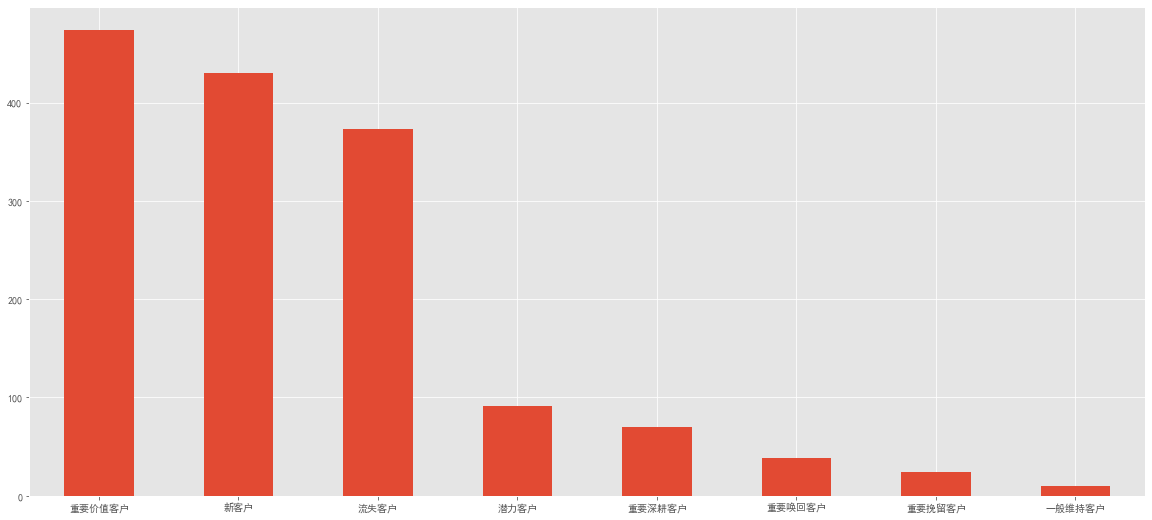

In [52]:
def rfm_func(x):
    level=x.apply(lambda x: "1" if x >=1 else '0')
    label=level.R + level.F + level.M
    d={'011':'重要价值客户',
      '111':'重要唤回客户',
      '001':'重要深耕客户',
      '101':'重要挽留客户',
      '010':'潜力客户',
      '110':'一般维持客户',
      '000':'新客户',
      '100':'流失客户'}
    result = d[label]
    return result

rfmdf['label']=rfmdf[['R','F','M']].apply(lambda x:x-x.mean()).apply(rfm_func,axis=1)
rfmdf.groupby('label').count()

rfmdf.label.value_counts().plot.bar(figsize=(20,9))
plt.xticks(rotation=0)
